# Create a network with two population units

Here two spheres are placed with radie 200 micrometer using the density function ```(d < 200e-6)*1```. You can also use decaying densities ```exp(-d/200e-6)``` or any other function of ```d``` distance to the centre. The equation strings are evaluated using numexpr.

You specify what ```neuron_types``` are included in the population unit.

To see how to run SnuddaDetect and SnuddaPrune below in parallel using ipyparallel please see ```simple_network_parallel.ipynb```.

In short, type the following in a terminal window when you are in the ```examples/notebooks``` directory to start ipyparallel when it is installed:

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start 
```

In [1]:
import os
import numpy as np
from snudda import SnuddaInit

network_path = os.path.join("networks","population_unit_network")
config_file = os.path.join(network_path, "network-config.json")
si = SnuddaInit(config_file=config_file, random_seed=12345)
si.define_striatum(num_dSPN=1000, num_iSPN=1000, num_FS=0, num_LTS=0, num_ChIN=0,
                   volume_type="cube", neurons_dir="$DATA/neurons")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=100)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=100)
 
si.write_json(config_file)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Writing networks/population_unit_network/network-config.json


In [2]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

Reading SNUDDA_DATA=None from networks/population_unit_network/network-config.json


In the figure below you can see the two population units (cyan and brown), as well as the neurons not belonging to a population unit (grey).

Reading SNUDDA_DATA=None from networks/population_unit_network/network-config.json
Population unit 0 has 1800 neurons
Population unit 1 has 100 neurons
Population unit 2 has 100 neurons


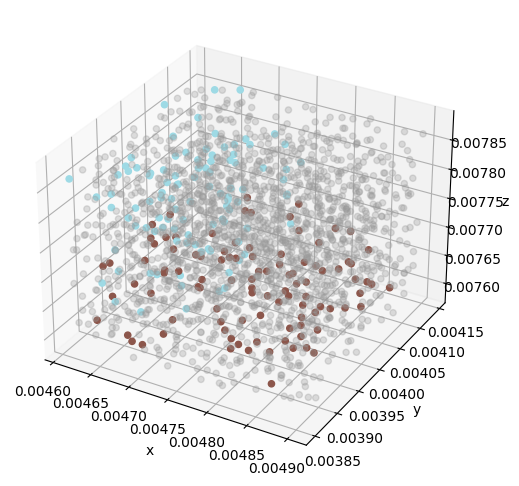

In [3]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations()

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [4]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

Reading SNUDDA_DATA=None from networks/population_unit_network/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 31/125 (1996 neurons)
Processing hyper voxel : 32/125 (1720 neurons)
Processing hyper voxel : 56/125 (1608 neurons)
Processing hyper voxel : 36/125 (1565 neurons)
Processing hyper voxel : 57/125 (1195 neurons)
Processing hyper voxel : 37/125 (1140 neurons)
Processing hyper voxel : 61/125 (1048 neurons)
Processing hyper voxel : 26/125 (865 neurons)
Processing hyper voxel : 6/125 (805 neurons)
Processing hyper voxel : 30/125 (721 neurons)
Processing hyper voxel : 62/125 (706 neurons)
Processing hyper voxel : 7/125 (567 neurons)
Processing hyper voxel : 27/125 (552 neurons)
Processing hyper voxel : 51/125 (475 neurons)
Processing hyper voxel : 55/125 (418 neurons)
Processing hyper voxel : 11/125 (405 neurons)
Processing hyper voxel : 35/125 (386 neurons)
Processing hyper voxel : 52/125 (295 neurons)
Processing hyper voxel : 1

In [6]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

Worker synapses: 16/20043168 (heap size: 26)
Worker synapses: 7042746/20043168 (heap size: 26)
Worker synapses: 12817297/20043168 (heap size: 21)
Worker synapses: 17858935/20043168 (heap size: 19)
Worker synapses: 20043168/20043168 (heap size: 0)
Read 20043168 out of total 20043168 synapses
